# Furijeova transformacija

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import fft

In [19]:
# anuliranje elemenata manjih od 3

arr = np.array([2,3,4])
print('Arr: ', arr)
mask = arr > 3
print('\nMask: ', mask)
print('\nMask * 4: ', mask * arr)

Arr:  <IntegerArray>
[2, 3, 4]
Length: 3, dtype: Int64

Mask:  <BooleanArray>
[False, False, True]
Length: 3, dtype: boolean

Mask * 4:  [0 0 4]


### $f(t)$ - funkcija koja predstavlja signal, $t$ - vreme

Ima smisla razmatrati:
* Jacinu signala u zavisnosti od vremena - vremenski domen
* Zastupljenost frekvencija u signalu - frekvencijski domen

Prelazak iz jednog u drugo:

* **Furijeova transformacija** - iz vremenskog u frekvencijski domen
* **Inverzna Furijeova transformacija** - iz frekvencijskog u vremenski domen

### Sinusoida $a*sin([2pi * fo] * t + phi)$

$a$ - amplituda

$fo$ - osnovna frekvencija (broj obrtaja u sekundi)

$wo = 2pi * fo$ - ugaona frekvencija

$phi$ - faza (koliko je sinusoida pomerena na $x$-osi u odnosu na koordinatni pocetak, grafik kosinusne funkcije je takođe sinusoida, pomerena po $x$-osi za vrednost $\pi/2$)

### T, N, Ts, Fs

$Ts$ - period uzorkovanja (na svakih Ts sekundi vrsi se merenje signala)

$Fs = 1 / Ts$ - frekvencija uzorkovanja ($Hz$)

$N$ - ukupan broj uzoraka

$T = N * Ts$ - ukupno vreme

$delta_f = Fs / N$ - frekvencijska rezolucija

### Primer
Neka je $f(t) = 2\sin (2\pi t) + 3 \sin (44\pi t) + \epsilon$, gde je $\epsilon$ šum, koji ćemo generisati proizvoljno iz standardne normalne raspodele. Neka je signal izmeren 6000 puta tokom 100 sekundi.

In [21]:
N = 6000
T = 100
# T = N * Ts
Ts = T/N
Fs = 1/Ts
Ts, Fs

(0.016666666666666666, 60.0)

In [28]:
t = np.linspace(0, T, N, endpoint = True)
t.shape

(6000,)

In [30]:
eps = np.random.randn(N)

In [65]:
f = 2 * np.sin(2 * np.pi * t) + 3 * np.sin(44 * np.pi * t) + eps

$f = 2 * sin(2pi * t) + 3 * sin(44pi * t) + eps = f = 2 * sin(1* 2pi * t) + 3 * sin(22 * 2pi * t) + eps$

$fo$ - $1$ i $22$ (osnovna frekvencija, broj obrtaja u sekundi)

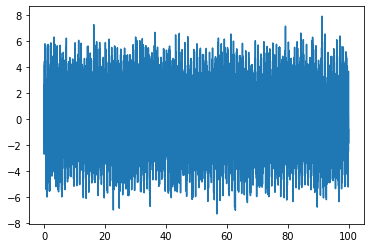

In [34]:
plt.plot(t, f)
plt.show()

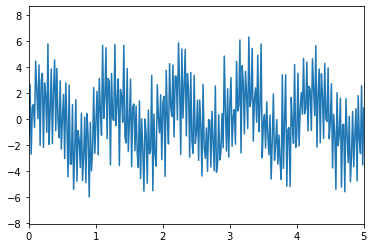

In [40]:
plt.plot(t, f)
plt.xlim(0, 5)
plt.show()

In [45]:
coefs = fft.fft(f)
coefs

array([-30.46522969 +0.j        ,  91.35241409-90.06730471j,
        22.58224159+41.91499017j, ..., -90.78486368+49.07201954j,
        22.58224159-41.91499017j,  91.35241409+90.06730471j])

In [46]:
coefs.shape

(6000,)

In [47]:
freq = fft.fftfreq(N, Ts)
freq

array([ 0.  ,  0.01,  0.02, ..., -0.03, -0.02, -0.01])

In [58]:
freq.shape

(6000,)

Dva spektra dobijenih koeficijenata:

* **spektar magnituda**
* **spektar faza**

**Spektar magnituda** - na x-osi frekvencije iz frekvencijskog domena, na y-osi vrednosti modula koeficijenata (magnituda)

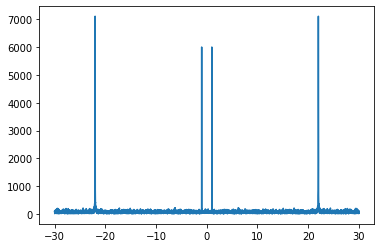

In [54]:
plt.plot(freq, np.abs(coefs))
plt.show()

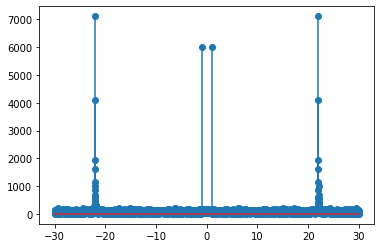

In [66]:
plt.stem(freq, np.abs(coefs), use_line_collection=True)
plt.show()

Izdvajaju se pikovi -+ 22 i -+ 1 (fo - osnovna frekvencija, broj obrtaja u sekundi)

**Spektar faza** - na x-osi su frekvencije iz frekvencijskog domena, na y-osi su vrednosti argumenata koeficijenata

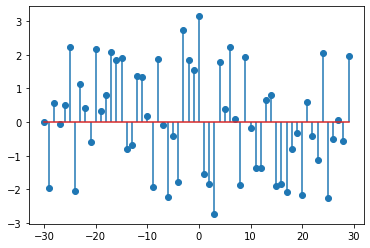

In [64]:
plt.stem(freq[::100], np.angle(coefs)[::100]) # step = 100
plt.show()

### Eliminacija suma

Uvidom u frekvencije prisutne u signalu šum možemo eliminisati anuliranjem koeficijenata kod kojih je magnituda (modul koeficijenata) manja od 1000.

In [70]:
mask = np.abs(coefs) >= 1000 # ostace true oni koji su >= 1000, a oni koji su < 1000 ce biti false
coefs_filtered = mask * coefs
coefs_filtered

array([-0.+0.j,  0.+0.j,  0.+0.j, ..., -0.+0.j,  0.+0.j,  0.+0.j])

In [73]:
f_filtered = fft.ifft(coefs_filtered)

C:\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


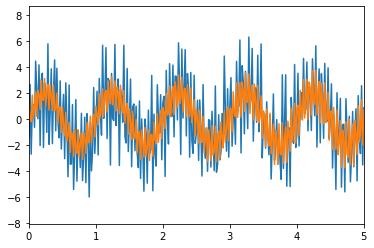

In [75]:
plt.plot(t, f)
plt.plot(t, f_filtered)
plt.xlim(0,5)
plt.show()